In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.1.2
2.5


In [3]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS

def sum_over(*args):
    return sum(args)

In [4]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [6]:
planning_steps

array([0, 1, 2])

In [7]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [8]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [9]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [10]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2'], function=<function sum_over at 0x00000277AE918828>)
ScalarOutcome('A.1_Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x00000277AE918828>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x00000277AE918828>)
ScalarOutcome('A.2_Expected Annual Damage', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2'], function=<function sum_over at 0x00000277AE918828>)
ScalarOutcome('A.2_Dike Investment Costs', variable_name=['A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 100 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


dict_keys(['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage', 'A.2_Dike Investment Costs', 'A.2_Expected Number of Deaths', 'A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage', 'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths', 'A.5_Expected Annual Damage', 'A.5_Dike Investment Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

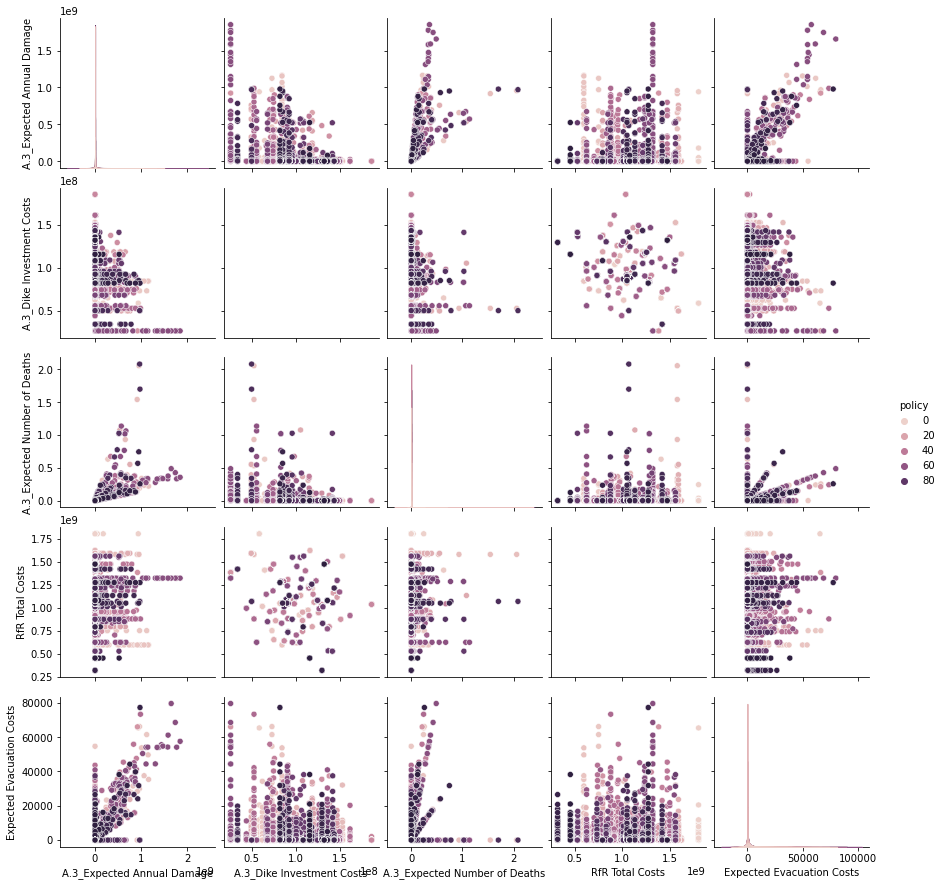

In [10]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100, policies=100)
#observing the simulation runs
experiments, outcomes = results

policies = experiments['policy']

for i, policy in enumerate(np.unique(policies)):
    experiments.loc[experiments['policy']==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies

A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]
sns.pairplot(A_3data, hue='policy', vars=['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

In [6]:
from ema_workbench import save_results
from ema_workbench.util.utilities import load_results

In [12]:
save_results((experiments, outcomes), './results_analysis1.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Quint\Documents\GitHub\MBDM\final assignment\results_analysis1.tar.gz


In [7]:
experiments,outcomes=load_results('./results_analysis1.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Quint\Documents\GitHub\MBDM\final assignment\results_analysis1.tar.gz


In [8]:
#observing the simulation runs
print(outcomes.keys())
experiments

dict_keys(['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage', 'A.2_Dike Investment Costs', 'A.2_Expected Number of Deaths', 'A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage', 'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths', 'A.5_Expected Annual Damage', 'A.5_Dike Investment Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,92.0,36.627483,1.0,0.717891,286.950920,1.5,0.711619,116.904455,1.5,0.997152,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,0,0,dikesnet
1,129.0,48.135382,10.0,0.174033,315.398612,10.0,0.190892,57.960907,10.0,0.444956,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,1,0,dikesnet
2,105.0,114.005436,1.5,0.497765,117.213436,1.5,0.223015,193.161033,1.0,0.833327,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,2,0,dikesnet
3,79.0,235.431159,1.5,0.971077,32.298769,1.0,0.342229,319.701227,1.5,0.771428,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,3,0,dikesnet
4,121.0,135.055121,1.5,0.112816,299.595954,1.0,0.881769,89.265982,1.0,0.807592,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,102.0,199.190730,1.0,0.146399,221.647121,10.0,0.725807,348.536739,1.0,0.823555,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,95,99,dikesnet
9996,100.0,31.914259,1.5,0.814719,292.242401,10.0,0.671766,280.246302,1.0,0.347260,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,96,99,dikesnet
9997,27.0,230.568173,10.0,0.543080,263.174397,10.0,0.616425,335.119685,1.5,0.291768,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,97,99,dikesnet
9998,63.0,260.157638,1.0,0.402495,320.297261,1.5,0.751741,146.467332,10.0,0.607875,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,98,99,dikesnet


In [9]:
outcomes

{'A.1_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.1_Dike Investment Costs': array([1.49071579e+08, 1.49071579e+08, 1.49071579e+08, ...,
        2.32328289e+08, 2.32328289e+08, 2.32328289e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Expected Annual Damage': array([       0.        ,  7533825.02684883, 19122715.87794481, ...,
               0.        ,        0.        ,        0.        ]),
 'A.2_Dike Investment Costs': array([2.21440566e+08, 2.21440566e+08, 2.21440566e+08, ...,
        2.25454723e+08, 2.25454723e+08, 2.25454723e+08]),
 'A.2_Expected Number of Deaths': array([0.        , 0.00100836, 0.00158466, ..., 0.        , 0.        ,
        0.        ]),
 'A.3_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.3_Dike Investment Costs': array([5.87680987e+07, 5.87680987e+07, 5.87680987e+07, ...,
        1.32114098e+08, 1.32114098e+08, 1.32114098e+08]),
 'A.3_Expected Number of Deaths': array([0., 0., 0.

In [10]:
policies = experiments['policy']

In [11]:
data = pd.DataFrame(outcomes)
data['policy'] = policies

A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]

In [12]:
outcomes['total expected Annual Damage']=outcomes['A.1_Expected Annual Damage']+outcomes['A.2_Expected Annual Damage']+outcomes['A.3_Expected Annual Damage']+outcomes['A.4_Expected Annual Damage']+outcomes['A.5_Expected Annual Damage']
outcomes['total dike investment costs']=outcomes['A.1_Dike Investment Costs']+outcomes['A.2_Dike Investment Costs']+outcomes['A.3_Dike Investment Costs']+outcomes['A.4_Dike Investment Costs']+outcomes['A.5_Dike Investment Costs']
outcomes['total Expected Number of Deaths']=outcomes['A.1_Expected Number of Deaths']+outcomes['A.2_Expected Number of Deaths']+outcomes['A.3_Expected Number of Deaths']+outcomes['A.4_Expected Number of Deaths']+outcomes['A.5_Expected Number of Deaths']

In [13]:
data['total expected Annual Damage']=data['A.1_Expected Annual Damage']+data['A.2_Expected Annual Damage']+data['A.3_Expected Annual Damage']+data['A.4_Expected Annual Damage']+data['A.5_Expected Annual Damage']
data['total dike investment costs']=data['A.1_Dike Investment Costs']+data['A.2_Dike Investment Costs']+data['A.3_Dike Investment Costs']+data['A.4_Dike Investment Costs']+data['A.5_Dike Investment Costs']
data['total Expected Number of Deaths']=data['A.1_Expected Number of Deaths']+data['A.2_Expected Number of Deaths']+data['A.3_Expected Number of Deaths']+data['A.4_Expected Number of Deaths']+data['A.5_Expected Number of Deaths']

In [14]:
A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]
A_totaldata=data[['total expected Annual Damage','total dike investment costs','total Expected Number of Deaths','RfR Total Costs', 'Expected Evacuation Costs', "policy"]]

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

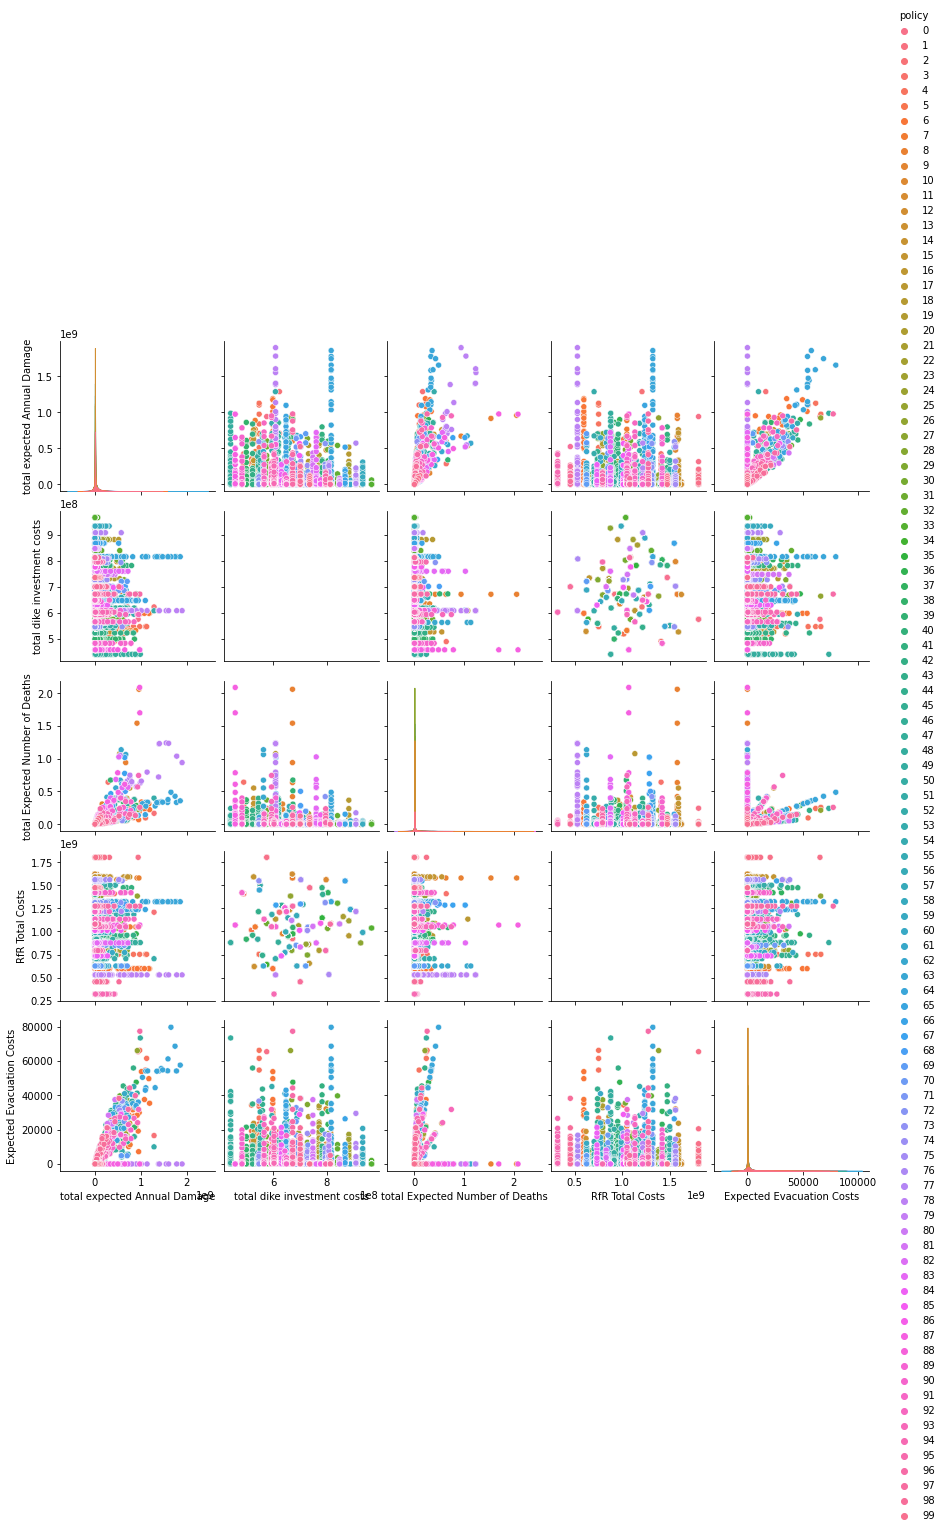

In [15]:
sns.pairplot(A_totaldata, hue='policy', vars=['total expected Annual Damage','total dike investment costs','total Expected Number of Deaths','RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

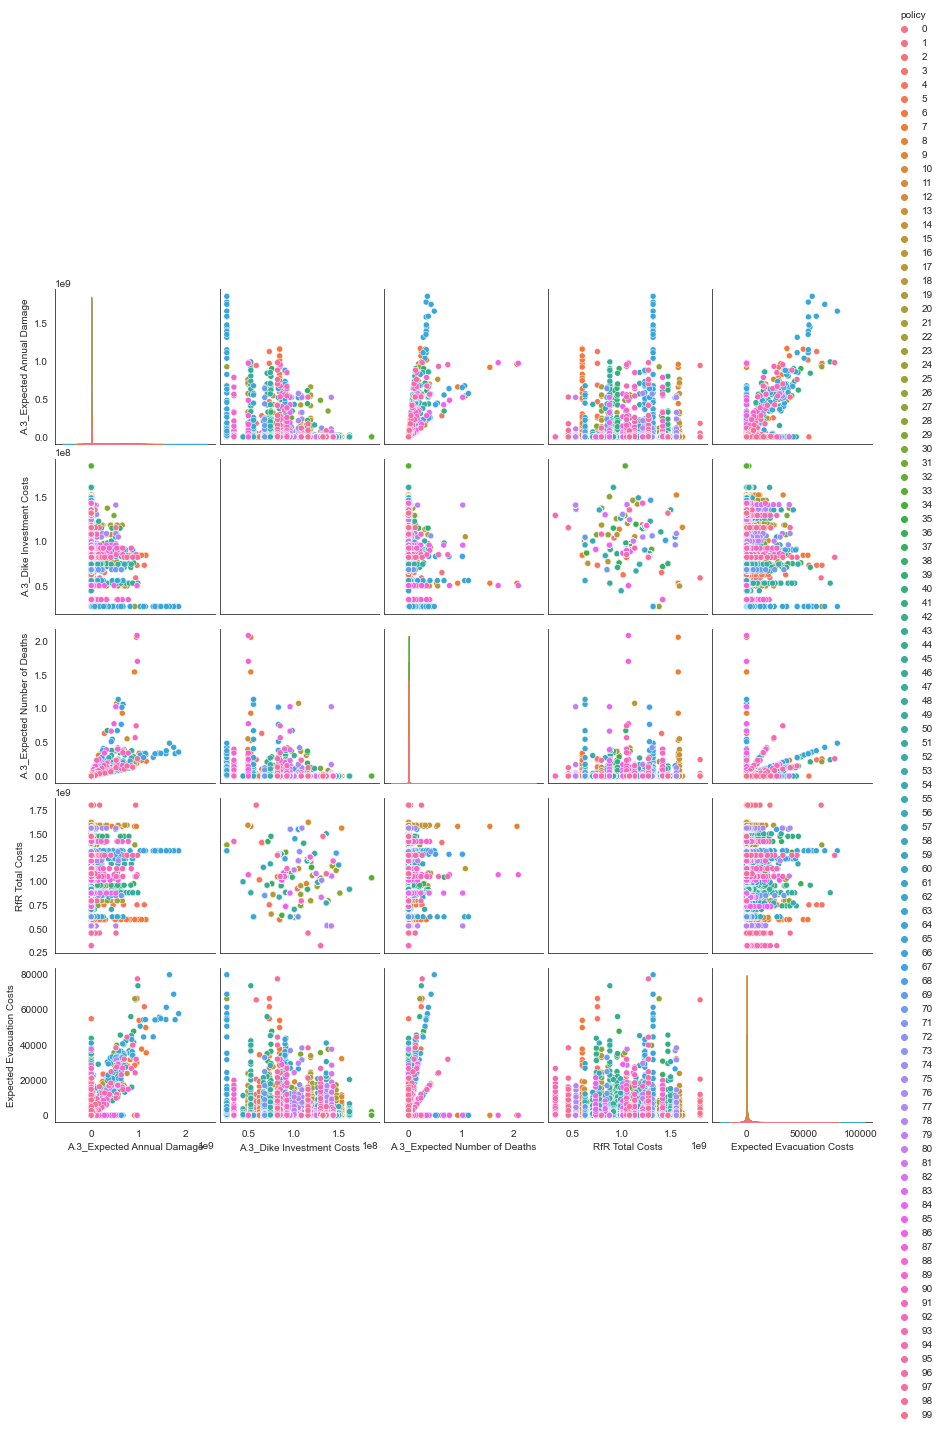

In [37]:
snsplotje=sns.pairplot(A_3data, hue='policy', vars=['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

snsplotje.savefig("output.png")

Things to conclude:
*  Seems to be a clear connection between dike investment costs and expected evacuation costs & expected number of deaths-> the more dike investment, the less expected evactuation costs and the less expected number of deaths.
* This is not as clearly visible for the RFR total costs. More money spend on the RFR total costs does not seem to influence expected evacuation and expected number of deaths A3 positively, based on the above figure.
* Expected number of deaths, expected annual damage and expected evacuation costs seem positively  correlated.
    

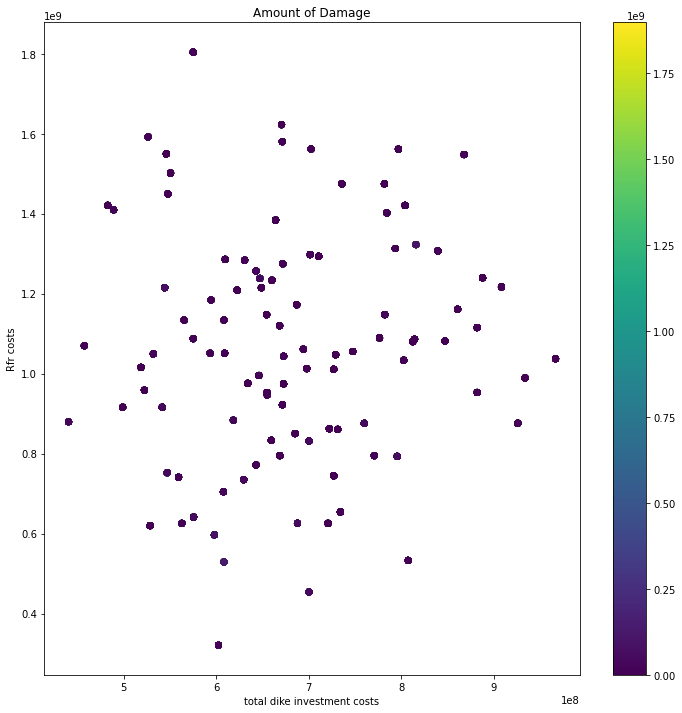

In [26]:
ADAMAGE = A_totaldata['total expected Annual Damage']
ADEATH = A_totaldata['total Expected Number of Deaths']
ACOST = A_totaldata['Expected Evacuation Costs']


fig, ax = plt.subplots(figsize=(12,12))
im=ax.scatter(A_totaldata['total dike investment costs'], A_totaldata['RfR Total Costs'], c=ADAMAGE,vmin=A_totaldata['total expected Annual Damage'].min(),vmax=A_totaldata['total expected Annual Damage'].max())
ax.set_title('Amount of Damage')
ax.set_xlabel('total dike investment costs')
ax.set_ylabel('Rfr costs')
fig.colorbar(im, ax=ax)


In [19]:
worst50deaths = sorted(outcomes['A.3_Expected Number of Deaths'])[-250:]


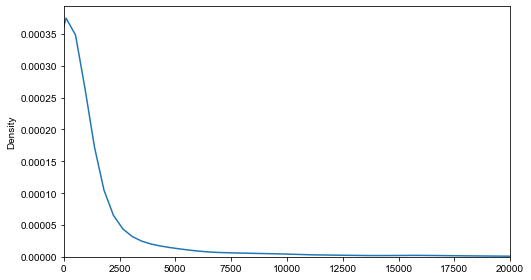

In [20]:
worst50evac = sorted(outcomes['Expected Evacuation Costs'])[-450:]

fig, ax = plt.subplots()
sns.kdeplot(outcomes['Expected Evacuation Costs'], ax = ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 20000])
fig.subplots_adjust(bottom=0.3)
plt.show()

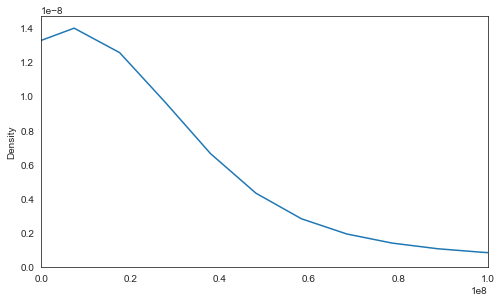

In [21]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['total expected Annual Damage'], ax = ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 1E08])
fig.subplots_adjust(bottom=0.3)
plt.show()

In [38]:
ydeaths = outcomes['A.3_Expected Number of Deaths'] < 0.00001
np.sum(ydeaths)

7966

In [43]:
ydeaths=outcomes['total Expected Number of Deaths']<0.00001

In [73]:
data.loc[(data['A.3_Expected Number of Deaths'] < 0.00001) & (data['Expected Evacuation Costs'] < 1000) & (data['A.3_Expected Annual Damage'] < 0.1e08)]

,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,...,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy,total expected Annual Damage,total dike investment costs,total Expected Number of Deaths
0,0.0,1.490716e+08,0.0,0.000000e+00,2.214406e+08,0.000000,0.0,5.876810e+07,0.0,0.000000,...,0.000000,0.000000e+00,1.057941e+08,0.000000,1.804200e+09,0.000000,0,0.000000e+00,5.750853e+08,0.000000
1,0.0,1.490716e+08,0.0,7.533825e+06,2.214406e+08,0.001008,0.0,5.876810e+07,0.0,0.000000,...,0.000000,0.000000e+00,1.057941e+08,0.000000,1.804200e+09,506.176749,0,7.533825e+06,5.750853e+08,0.001008
2,0.0,1.490716e+08,0.0,1.912272e+07,2.214406e+08,0.001585,0.0,5.876810e+07,0.0,0.000000,...,0.000000,2.247210e+06,1.057941e+08,0.000374,1.804200e+09,994.717816,0,2.136993e+07,5.750853e+08,0.001959
3,0.0,1.490716e+08,0.0,4.130381e+06,2.214406e+08,0.000687,0.0,5.876810e+07,0.0,933624.095306,...,0.000077,0.000000e+00,1.057941e+08,0.000000,1.804200e+09,440.603139,0,5.064005e+06,5.750853e+08,0.000763
4,0.0,1.490716e+08,0.0,0.000000e+00,2.214406e+08,0.000000,0.0,5.876810e+07,0.0,0.000000,...,0.000000,0.000000e+00,1.057941e+08,0.000000,1.804200e+09,0.000000,0,0.000000e+00,5.750853e+08,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,2.323283e+08,0.0,0.000000e+00,2.254547e+08,0.000000,0.0,1.321141e+08,0.0,0.000000,...,0.000000,0.000000e+00,1.041075e+08,0.000000,1.474700e+09,0.000000,99,0.000000e+00,7.356223e+08,0.000000
9996,0.0,2.323283e+08,0.0,0.000000e+00,2.254547e+08,0.000000,0.0,1.321141e+08,0.0,0.000000,...,0.000000,0.000000e+00,1.041075e+08,0.000000,1.474700e+09,0.000000,99,0.000000e+00,7.356223e+08,0.000000
9997,0.0,2.323283e+08,0.0,0.000000e+00,2.254547e+08,0.000000,0.0,1.321141e+08,0.0,0.000000,...,0.000000,2.152264e+07,1.041075e+08,0.023719,1.474700e+09,0.000000,99,2.152264e+07,7.356223e+08,0.023719
9998,0.0,2.323283e+08,0.0,0.000000e+00,2.254547e+08,0.000000,0.0,1.321141e+08,0.0,0.000000,...,0.000000,2.482454e+07,1.041075e+08,0.021629,1.474700e+09,0.000000,99,2.482454e+07,7.356223e+08,0.021629


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 2943 cases of interest
[MainProcess/INFO] mean: 0.6983333333333334, mass: 0.06, coverage: 0.14237172952769284, density: 0.6983333333333334 restricted_dimensions: 14


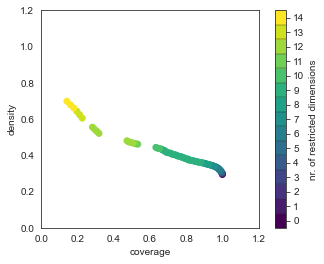

In [44]:
from ema_workbench.analysis import prim
x1 = experiments.drop(columns=['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2','policy'])

x=experiments
prim_alg = prim.Prim(x1, ydeaths, threshold=0.5, peel_alpha=0.01)
boxbestdeaths = prim_alg.find_box()

boxbestdeaths.show_tradeoff()
plt.show()

In [45]:
boxbestdeaths.peeling_trajectory[10:40]

,coverage,density,id,mass,mean,res_dim
10,0.983011,0.321444,10,0.90,0.321444,6
11,0.979952,0.324045,11,0.89,0.324045,6
12,0.978253,0.327159,12,0.88,0.327159,6
13,0.974856,0.329770,13,0.87,0.329770,6
14,0.970438,0.332093,14,0.86,0.332093,6
15,0.966361,0.334588,15,0.85,0.334588,6
16,0.961604,0.336905,16,0.84,0.336905,6
17,0.956507,0.339157,17,0.83,0.339157,7
18,0.950731,0.341220,18,0.82,0.341220,7
19,0.944275,0.343086,19,0.81,0.343086,7


coverage    0.983011
density     0.321444
id                10
mass             0.9
mean        0.321444
res_dim            6
Name: 10, dtype: object

                            box 10              \
                               min         max   
A.5_pfail                 0.026763    0.996543   
A.2_pfail                 0.023181    0.993417   
A.4_pfail                 0.017457    0.999989   
A.3_pfail                 0.007943    0.997152   
A.5_Bmax                 32.871390  349.715053   
A.0_ID flood wave shape   0.500000  132.000000   

                                                                     
                                                          qp values  
A.5_pfail                               [0.10394910036408467, -1.0]  
A.2_pfail                [0.11220153651579327, 0.29812271284747854]  
A.4_pfail                                 [0.116498189889669, -1.0]  
A.3_pfail                                [0.2678327445808698, -1.0]  
A.5_Bmax                    

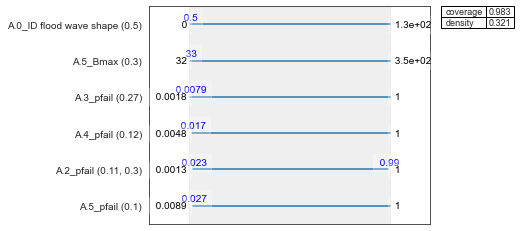

In [46]:
boxbestdeaths.inspect(10)
boxbestdeaths.inspect(10,style='graph')
plt.show()

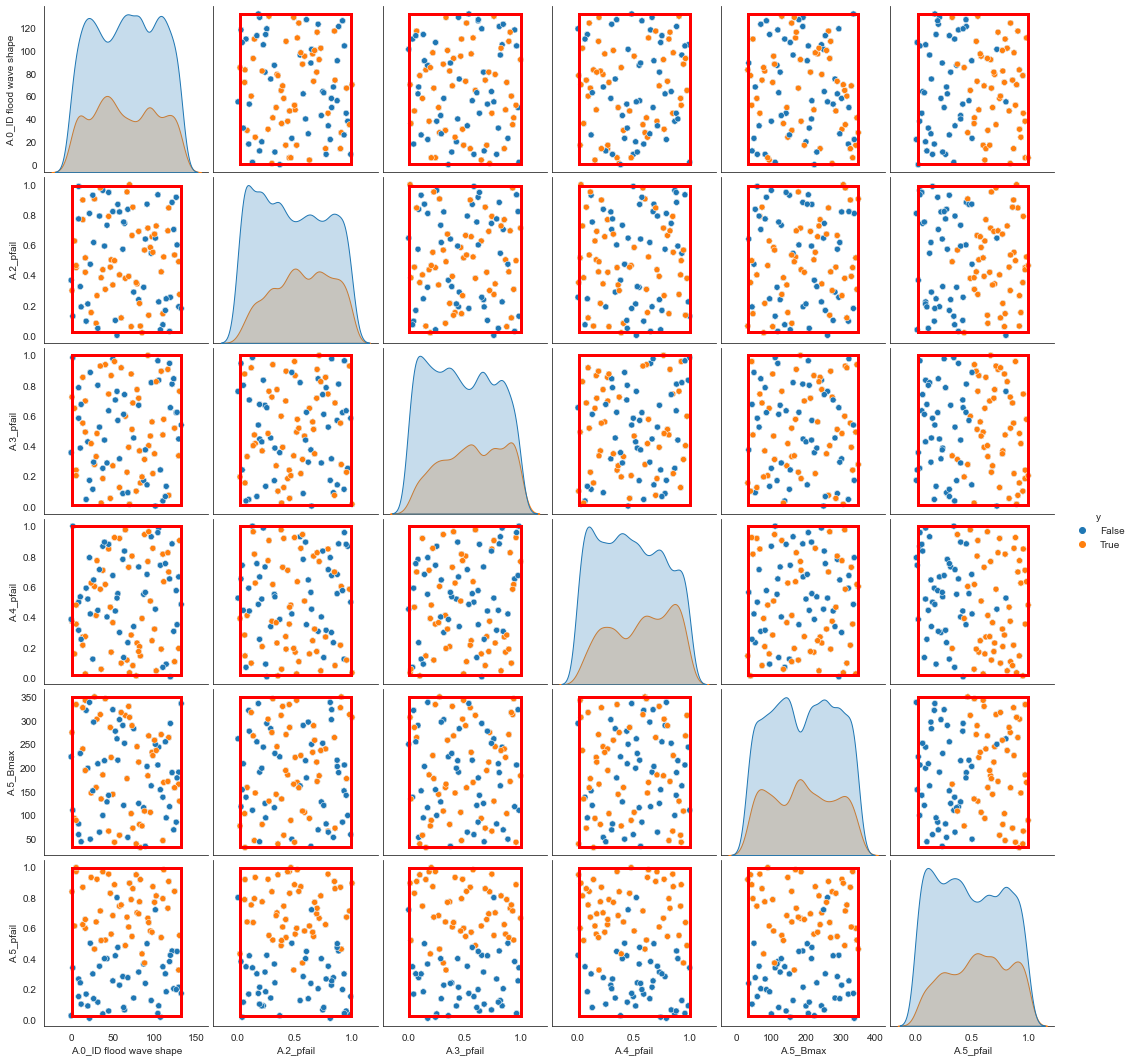

In [47]:
boxbestdeaths.show_pairs_scatter(10)
plt.show()

Above is clearly visible that, no dead people is highly correlated with a high A.3_pfail value, i.e. a small chance of dike failure at A3.

In [132]:
ydamage=outcomes['A.3_Expected Annual Damage'] < 0.1e08

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 8760 cases of interest
[MainProcess/INFO] mean: 0.998, mass: 0.05, coverage: 0.0569634703196347, density: 0.998 restricted_dimensions: 14


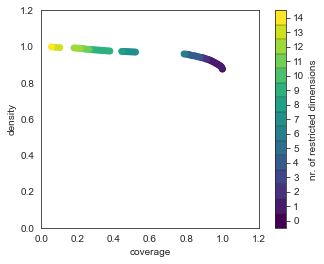

In [134]:
prim_alg = prim.Prim(x1, ydamage, threshold=0.5, peel_alpha=0.01)
boxdamage = prim_alg.find_box()

boxdamage.show_tradeoff()
plt.show()

In [135]:
boxdamage.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.876000,0,1.00,0.876000,0
1,0.997603,0.882727,1,0.99,0.882727,1
2,0.993950,0.888469,2,0.98,0.888469,1
3,0.989041,0.893196,3,0.97,0.893196,1
4,0.982991,0.896979,4,0.96,0.896979,1
5,0.976712,0.900632,5,0.95,0.900632,1
6,0.970662,0.904574,6,0.94,0.904574,1
7,0.963813,0.907849,7,0.93,0.907849,1
8,0.957763,0.911957,8,0.92,0.911957,1
9,0.950799,0.915275,9,0.91,0.915275,1


coverage     0.21484
density     0.990526
id                52
mass            0.19
mean        0.990526
res_dim           12
Name: 52, dtype: object

                                  box 52                   \
                                     min              max   
A.2_Bmax                         32.2988          334.126   
A.2_pfail                     0.00133186         0.982554   
A.5_Bmax                          31.524            321.8   
A.3_pfail                       0.594321         0.997152   
A.5_pfail                       0.107977         0.902345   
discount rate 0          {2.5, 3.5, 4.5}  {2.5, 3.5, 4.5}   
A.1_Brate                     {1.0, 1.5}       {1.0, 1.5}   
A.4_pfail                      0.0246371         0.999989   
A.1_Bmax                         33.0612          328.074   
A.0_ID flood wave shape              0.5              128   
A.1_pfail                      0.0157167          0.99063   
A.4_Bmax                         34.5598          340.85

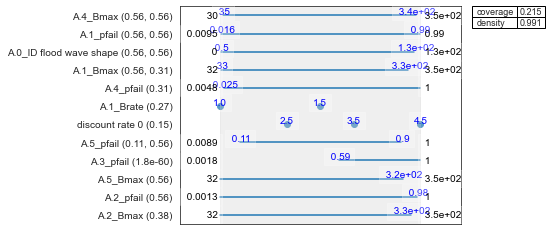

In [136]:
boxdamage.inspect(52)
boxdamage.inspect(52,style='graph')
plt.show()

In [139]:
yevac=outcomes['Expected Evacuation Costs'] < 1000

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 7698 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.116, coverage: 0.1506884905170174, density: 1.0 restricted_dimensions: 12


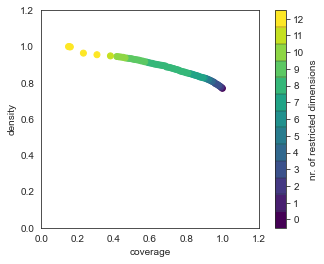

In [140]:
prim_alg = prim.Prim(x1, yevac, threshold=0.5, peel_alpha=0.01)
boxevac = prim_alg.find_box()

boxevac.show_tradeoff()
plt.show()

In [ ]:
boxevac.peeling_trajectory[20:30]

coverage    0.809561
density     0.853699
id                27
mass            0.73
mean        0.853699
res_dim            8
Name: 27, dtype: object

                            box 27              \
                               min         max   
A.0_ID flood wave shape   0.000000  131.000000   
A.5_pfail                 0.113474    0.996543   
A.2_pfail                 0.090612    0.993417   
A.3_pfail                 0.049093    0.997152   
A.4_pfail                 0.017457    0.999989   
A.1_pfail                 0.015717    0.994345   
A.4_Bmax                 34.559787  348.148167   
A.5_Bmax                 32.871390  349.715053   

                                                                      
                                                           qp values  
A.0_ID flood wave shape                  [-1.0, 0.30425467645354276]  
A.5_pfail                              [7.958574679971398e-11, -1.0]  
A.2_pfail                [4.067665153025291e-08, 0.5081627805200

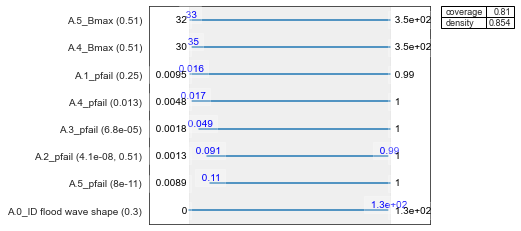

In [147]:
boxevac.inspect(27)
boxevac.inspect(27,style='graph')
plt.show()

In [28]:
boxdeaths.show_pairs_scatter(27)
plt.show()

NameError: name 'boxdeaths' is not defined

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 4019 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.105, coverage: 0.261259019656631, density: 1.0 restricted_dimensions: 7


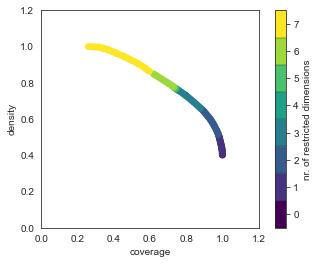

In [149]:

yevac = outcomes['Expected Evacuation Costs'] > worst50evac[0] 
yevac
ybestdeaths= (outcomes['A.3_Expected Number of Deaths'] < 0.00001) & (outcomes['Expected Evacuation Costs'] < 10) & (outcomes['A.3_Expected Annual Damage'] < 0.01e08)
ybestdeaths

prim_alg = prim.Prim(x, ybestdeaths, threshold=0.8, peel_alpha=0.01, mass_min=0.001)
boxdeaths = prim_alg.find_box()

boxdeaths.show_tradeoff()
plt.show()

In [153]:
boxdeaths.peeling_trajectory[70:]

,coverage,density,id,mass,mean,res_dim
70,0.731028,0.776427,70,0.3784,0.776427,6
71,0.727295,0.781551,71,0.3740,0.781551,6
72,0.716596,0.787962,72,0.3655,0.787962,6
73,0.705897,0.794678,73,0.3570,0.794678,6
74,0.700672,0.798186,74,0.3528,0.798186,6
75,0.689973,0.805168,75,0.3444,0.805168,6
76,0.678776,0.811905,76,0.3360,0.811905,6
77,0.667579,0.818987,77,0.3276,0.818987,6
78,0.656382,0.826441,78,0.3192,0.826441,6
79,0.644688,0.833655,79,0.3108,0.833655,6


coverage    0.689973
density     0.805168
id                75
mass          0.3444
mean        0.805168
res_dim            6
Name: 75, dtype: object

                                                      box 75  \
                                                         min   
policy     {1, 3, 8, 9, 10, 11, 12, 14, 16, 17, 18, 21, 2...   
A.3_pfail                                          0.0787224   
A.5_pfail                                          0.0317767   
A.4_pfail                                          0.0174574   
A.2_pfail                                          0.0231807   
A.5_Bmax                                             32.8714   

                                                              \
                                                         max   
policy     {1, 3, 8, 9, 10, 11, 12, 14, 16, 17, 18, 21, 2...   
A.3_pfail                                           0.997152   
A.5_pfail                                           0.996543   
A.4_pfail       

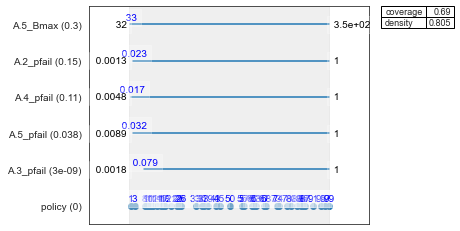

In [154]:
boxdeaths.inspect(75)
boxdeaths.inspect(75,style='graph')
plt.show()

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


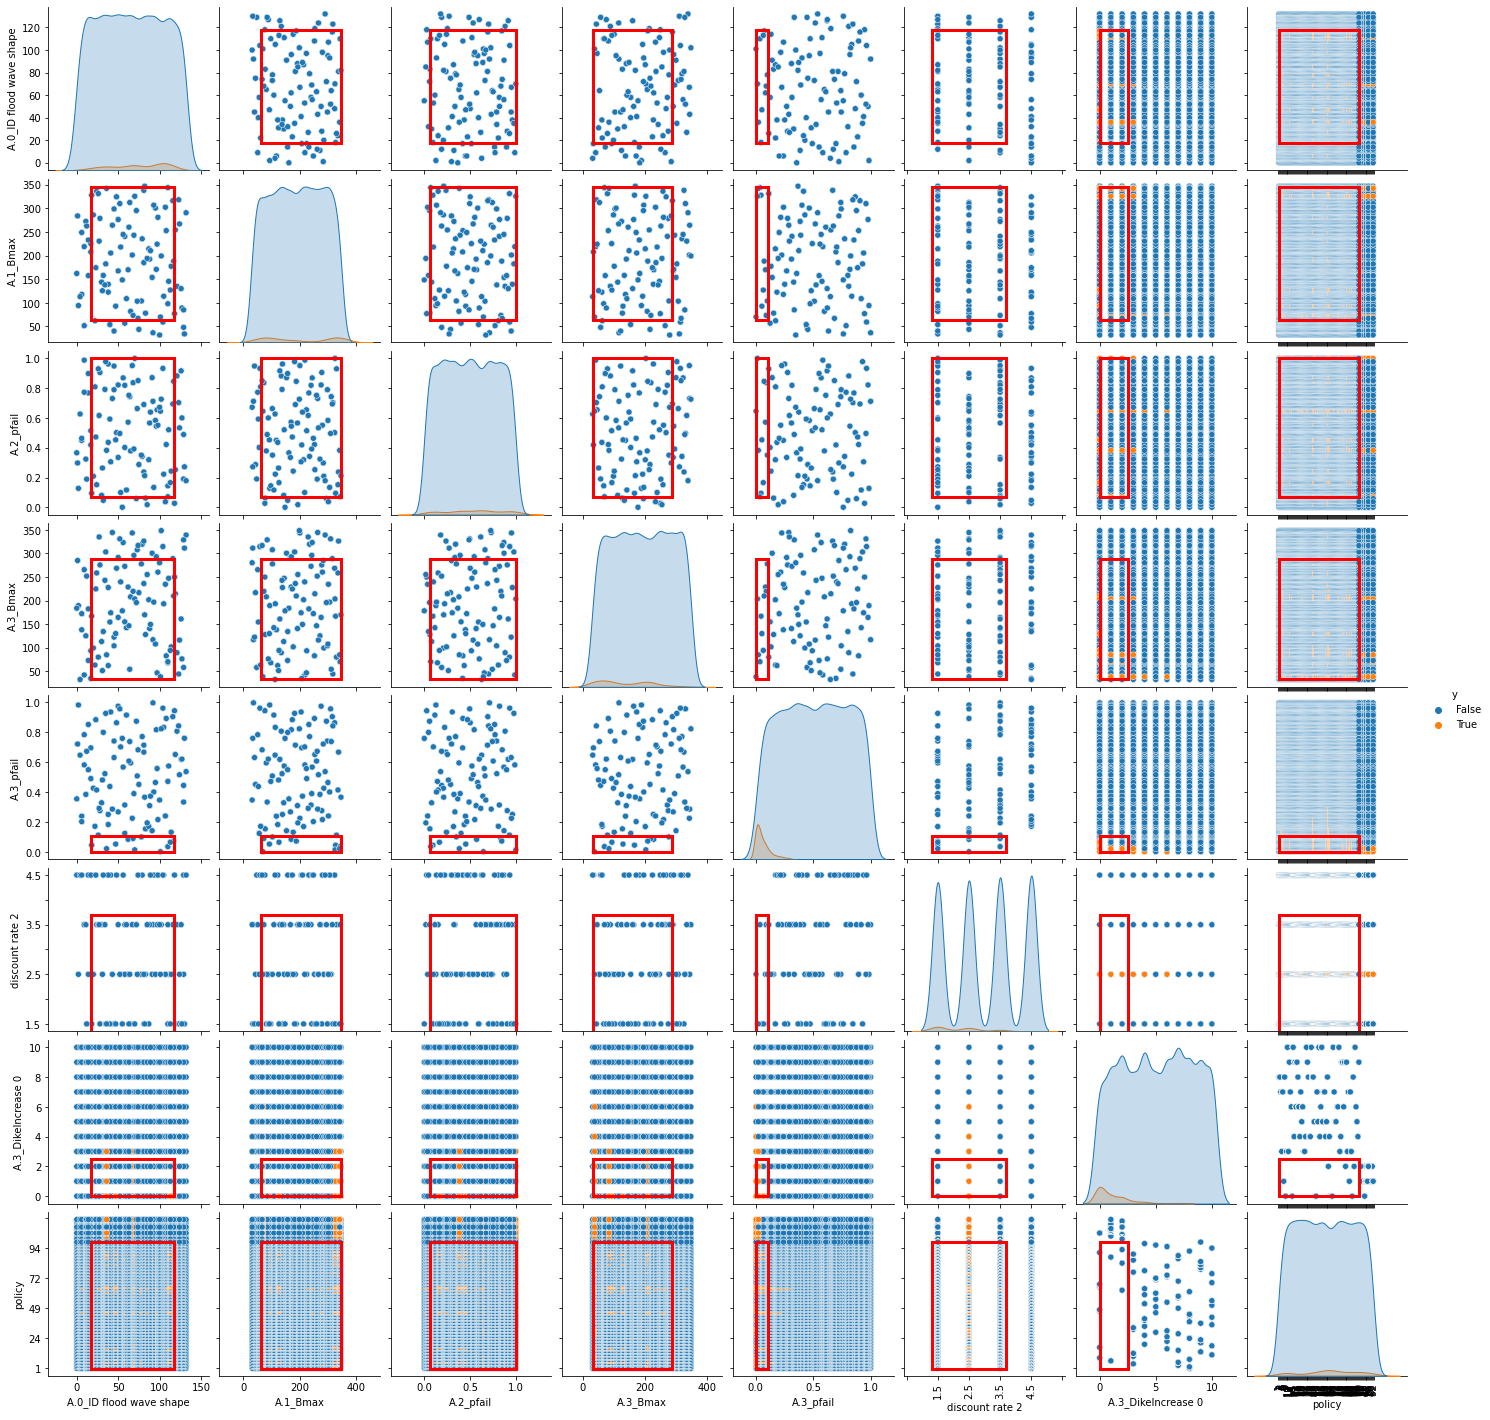

In [49]:
boxdeaths.show_pairs_scatter(87)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category


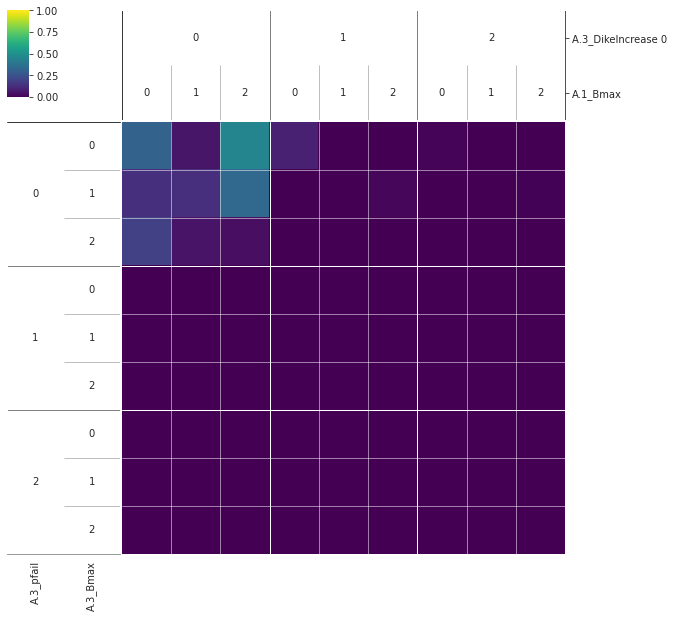

In [50]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,ydeaths, 2, nbins=3)
plt.show()

In [ ]:
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

with MultiprocessingEvaluator(dike_model) as evaluator:
    sa_results = perform_experiments(dike_model,policies=10,levers_sampling=SOBOL, evaluator=evaluator)

experiments, outcomes = sa_results

[MainProcess/INFO] pool started
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\SALib\sample\saltelli.py:52: FutureWarning: 
        Convergence properties of the Sobol' sequence is only valid if `N` = 2^n.
        SALib will continue on, but results may have issues.
        In future, this will raise an error.
        
  warnings.warn(msg, FutureWarning)
[MainProcess/INFO] performing 1 scenarios * 640 policies * 1 model(s) = 640 experiments


In [12]:
save_results((experiments, outcomes), './results_analysis_sobol1.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Quint\Documents\GitHub\MBDM\final assignment\results_analysis_sobol1.tar.gz


In [6]:
dike_model.levers

In [14]:
problem = get_SALib_problem(dike_model.levers)

In [15]:
Si_final = sobol.analyze(problem, outcomes['A.3_Expected Number of Deaths'],
                   calc_second_order=True, print_to_console=False)

In [16]:
len(Si_final['S1'])

31

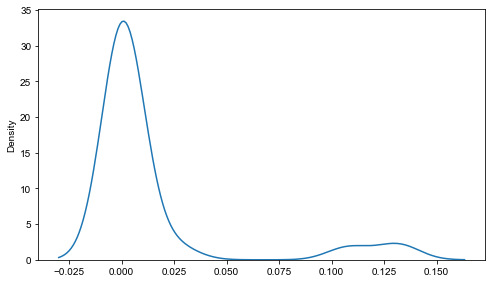

In [17]:
fig, ax = plt.subplots()
sns.kdeplot( outcomes['A.3_Expected Number of Deaths'], ax = ax)
sns.set_style('white')
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [22]:
a=[]
for i in dike_model.levers:
    a.append(repr(i))
len(a)

31

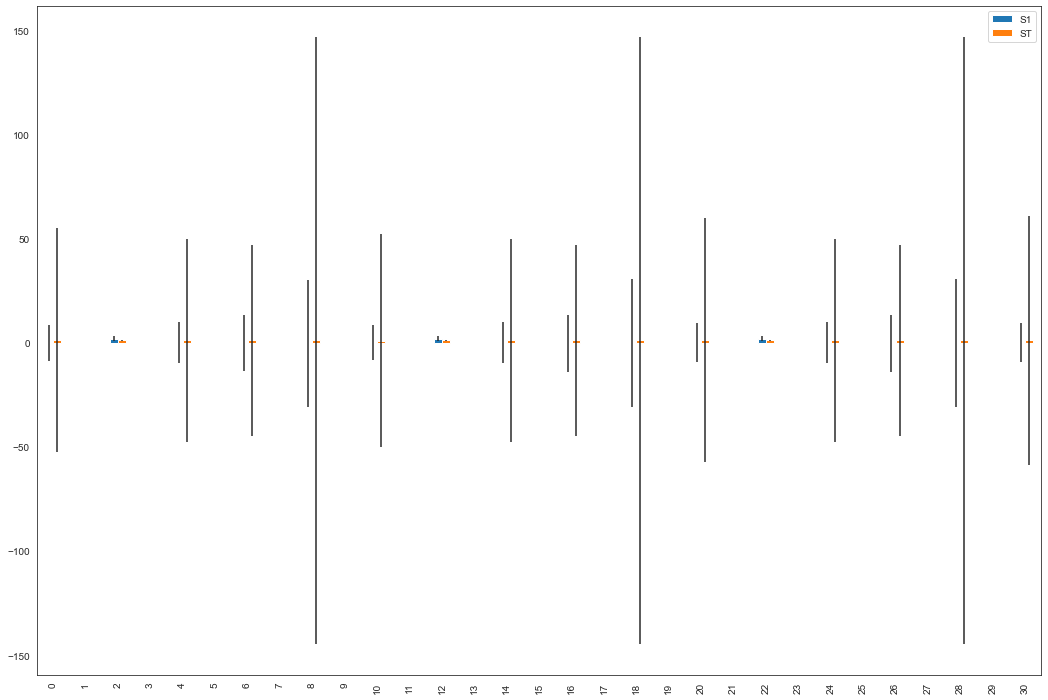

In [25]:
scores_filtered = {k:Si_final[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_finalplot = pd.DataFrame(scores_filtered, index=list(range(0, 31)))

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_finalplot[['S1','ST']]
err = Si_finalplot[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(18,16)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [ ]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    sa_results = perform_experiments(dike_model, scenarios=10, policies=10, levers_sampling=SOBOL, uncertainty_sampling=SOBOL, evaluator=evaluator)

[MainProcess/INFO] pool started
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\SALib\sample\saltelli.py:52: FutureWarning: 
        Convergence properties of the Sobol' sequence is only valid if `N` = 2^n.
        SALib will continue on, but results may have issues.
        In future, this will raise an error.
        
  warnings.warn(msg, FutureWarning)
[MainProcess/INFO] performing 400 scenarios * 640 policies * 1 model(s) = 256000 experiments
[MainProcess/INFO] 25600 cases completed
[MainProcess/INFO] 51200 cases completed
